<a href="https://colab.research.google.com/github/Harshavignyan/ML_Content/blob/main/Perceptron_withPython_Harsha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import joblib
from matplotlib.colors import ListedColormap

plt.style.use("fivethirtyeight")

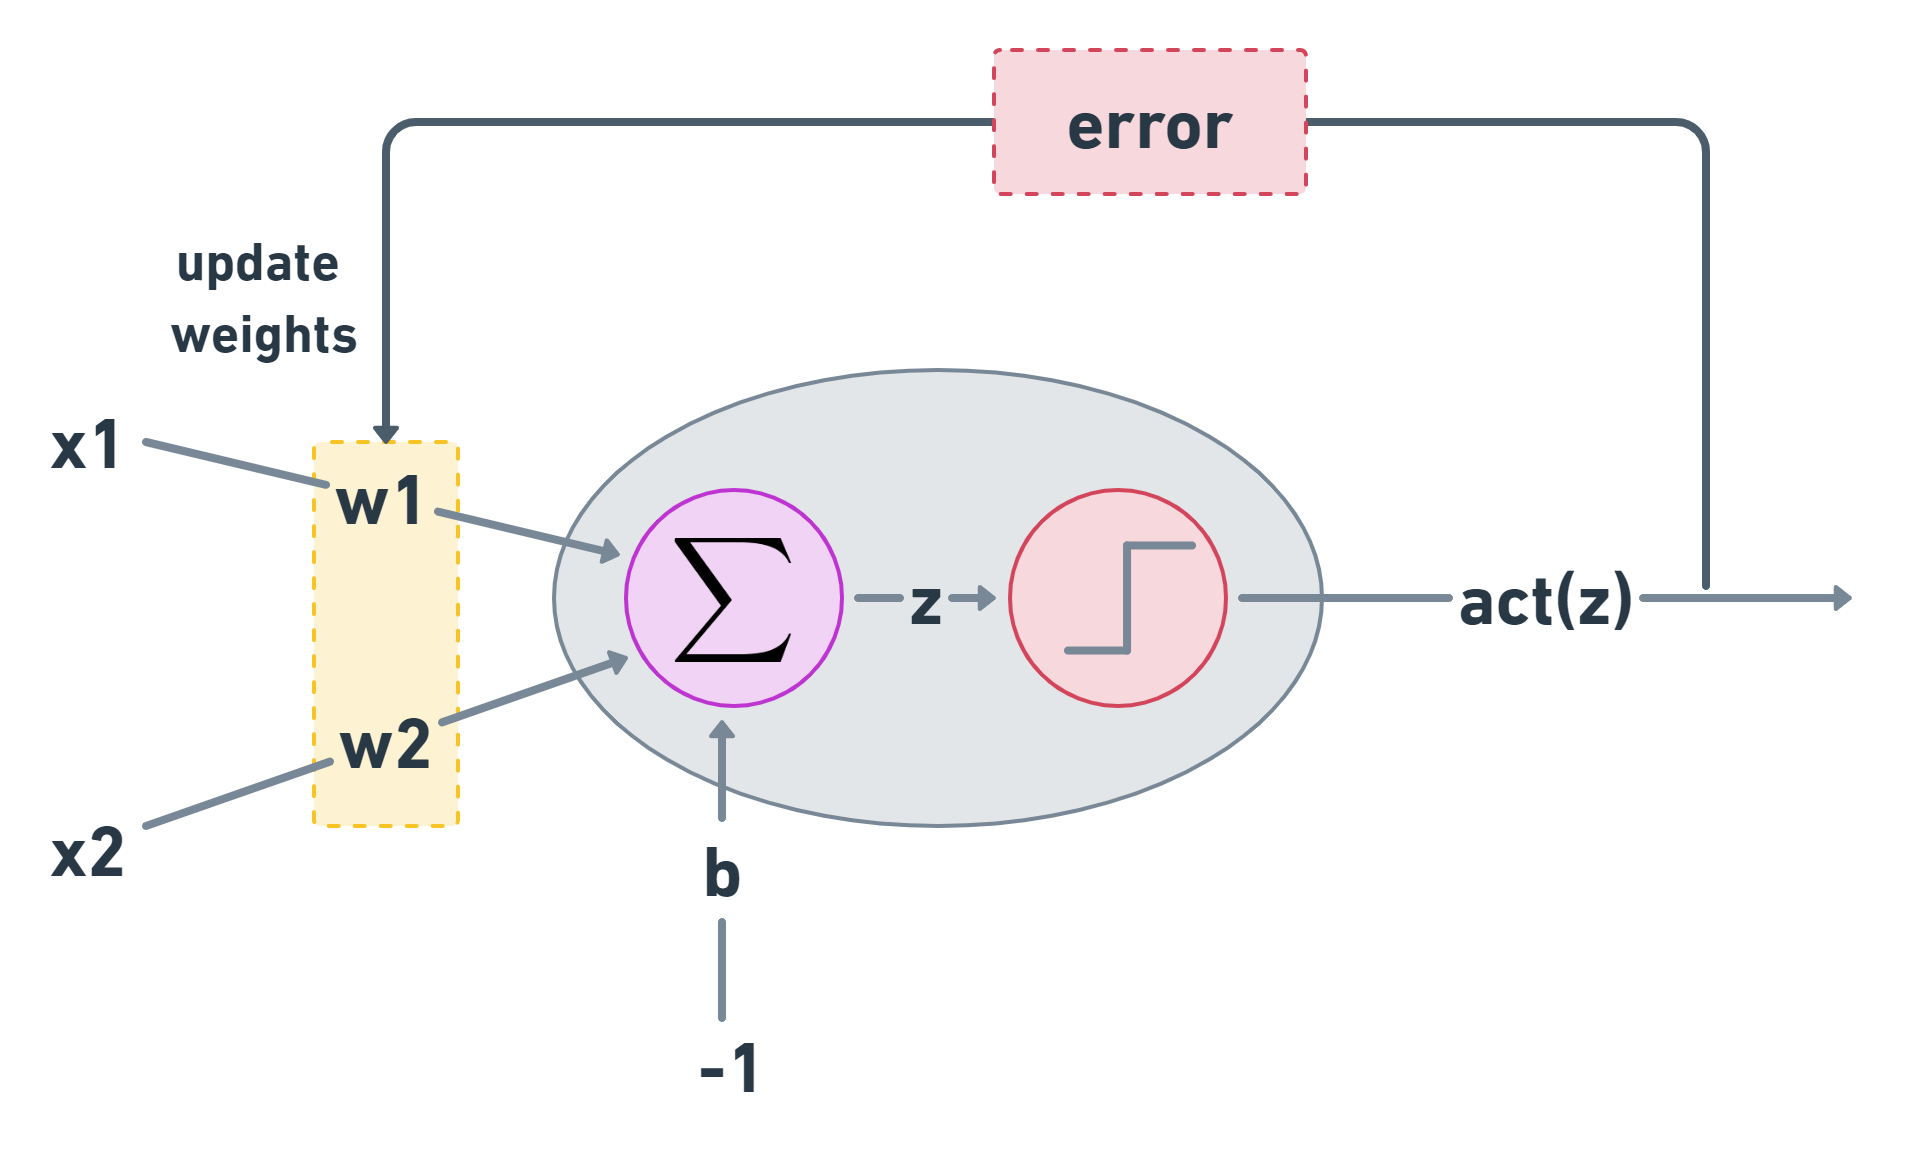

1. all the method names starting with "_" are inbuilt
2. "eta" is the learning rate it will be in float and initialized with None
3. "epochs" will be in int and initialized with None
4. 1e-4 is a number represented in Scientific Notation. It is 0.0001 as a decimal number or 1 / 10,000 as a fraction.
5. np.c_[np.array([1,2,3]), np.array([4,5,6])]
   https://numpy.org/doc/stable/reference/generated/numpy.c_.html

6. -np.ones is a single column

In [2]:
class Perceptron:
  def __init__(self, eta : float=None, epochs : int=None):
    self.weights = np.random.randn(3) * 1e-4 # small random weights (wt initialization)
    training = (eta is not None) and (epochs is not None) # if both are not none we give to train
    if training:
      print(f"initial weights before training: \n{self.weights}")
    self.eta = eta
    self.epochs = epochs

  def _z_outcome(self, inputs, weights):
    return np.dot(inputs, weights)

  def activation_function(self, z):
    return np.where(z > 0, 1, 0)

  def fit(self, X, y):
    self.X = X
    self.y = y

    X_with_bias = np.c_[self.X, -np.ones((len(self.X), 1))]
    print(f"X with bias: \n{X_with_bias}")

    for epoch in range(self.epochs):
      print("--"*10)
      print(f"for epoch >> {epoch}")
      print("--"*10)

      z = self._z_outcome(X_with_bias, self.weights)
      y_hat = self.activation_function(z)
      print(f"predicted value after forward pass: \n{y_hat}")

      self.error = self.y - y_hat
      print(f"error: \n{self.error}")
      
      self.weights = self.weights + self.eta * np.dot(X_with_bias.T, self.error) # weight update rule!
      print(f"updated weights after epochs: \n{epoch}/{self.epochs}: \n{self.weights}")
      print("##"*10)

  def predict(self, X): # this X is test input and it is diff from the real X input
    X_with_bias = np.c_[X, -np.ones((len(X), 1))]
    z = self._z_outcome(X_with_bias, self.weights)
    return self.activation_function(z)

  def total_loss(self):
    total_loss = np.sum(self.error)
    print(f"\ntotal loss: {total_loss}\n")
    return total_loss

  def _create_dir_return_path(self, model_dir, file_name):
    os.makedirs(model_dir, exist_ok = True)
    return os.path.join(model_dir, file_name)
  
  def save(self, file_name, model_dir=None):
    if model_dir is not None:
      model_file_path = self._create_dir_return_path(model_dir, file_name)
      joblib.dump(self, model_file_path)

    else:
      model_file_path = self._create_dir_return_path("model", file_name)
      joblib.dump(self, model_file_path)

  def load(self, filepath):
    return joblib.load(filepath)

In [3]:
def prepare_data(df, target_col="y"):
  X = df.drop(target_col, axis=1)

  y = df[target_col]

  return X, y

we will use AND gate dateset!

In [4]:
AND = {
    "x1" : [0,0,1,1],
    "x2" : [0,1,0,1],
    "y" : [0,0,0,1]
}

df_AND = pd.DataFrame(AND)

df_AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [5]:
X, y = prepare_data(df_AND)

ETA = 0.1 

# defining the value of activation function
# this is in the range of 0 and 1
# so you can update it accordingly
# depending on your output

EPOCHS = 10
model_and = Perceptron(eta=ETA, epochs=EPOCHS)
model_and.fit(X, y)

initial weights before training: 
[ 6.97457351e-05 -1.89251699e-05 -6.65857452e-06]
X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 0
--------------------
predicted value after forward pass: 
[1 0 1 1]
error: 
0   -1
1    0
2   -1
3    0
Name: y, dtype: int64
updated weights after epochs: 
0/10: 
[-9.99302543e-02 -1.89251699e-05  1.99993341e-01]
####################
--------------------
for epoch >> 1
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epochs: 
1/10: 
[6.97457351e-05 9.99810748e-02 9.99933414e-02]
####################
--------------------
for epoch >> 2
--------------------
predicted value after forward pass: 
[0 0 0 1]
error: 
0    0
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epochs: 
2/10: 
[6.97457351e-05 9.99810748e-02 9.99933414e-02]
####################
--------------------
for epoch >> 

In [6]:
_ = model_and.total_loss()


total loss: 0



In [7]:
model_and.save(file_name="and.model")
reload_model_and = Perceptron().load(filepath="model/and.model")
reload_model_and.predict(X=[[1,1]])

array([1])

we will use OR gate dateset!

In [8]:
OR = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y" : [0,1,1,1]
}

df_OR = pd.DataFrame(OR)

df_OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [9]:
X, y = prepare_data(df_OR)

ETA = 0.1 # 0 and 1
EPOCHS = 10

model_or = Perceptron(eta=ETA, epochs=EPOCHS)
model_or.fit(X, y)

_ = model_or.total_loss()

initial weights before training: 
[-1.80643604e-04 -8.97507632e-05 -4.82726595e-05]
X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 0
--------------------
predicted value after forward pass: 
[1 0 0 0]
error: 
0   -1
1    1
2    1
3    1
Name: y, dtype: int64
updated weights after epochs: 
0/10: 
[ 0.19981936  0.19991025 -0.20004827]
####################
--------------------
for epoch >> 1
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epochs: 
1/10: 
[ 0.19981936  0.19991025 -0.10004827]
####################
--------------------
for epoch >> 2
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epochs: 
2/10: 
[ 1.99819356e-01  1.99910249e-01 -4.82726595e-05]
####################
--------------------
for epoch >> 3
----------------

In [10]:
model_or.save(file_name="or.model", model_dir="model_or")

we will use XOR gate dateset!

In [11]:
XOR = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y" : [0,1,1,0]
}

df_XOR = pd.DataFrame(XOR)

df_XOR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [12]:
X, y = prepare_data(df_XOR)

ETA = 0.1 # 0 and 1
EPOCHS = 10

model_xor = Perceptron(eta=ETA, epochs=EPOCHS)
model_xor.fit(X, y)

_ = model_xor.total_loss()

initial weights before training: 
[ 1.51550801e-04 -9.01644860e-06 -1.39260302e-04]
X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 0
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights after epochs: 
0/10: 
[-0.09984845 -0.10000902  0.19986074]
####################
--------------------
for epoch >> 1
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epochs: 
1/10: 
[ 1.51550801e-04 -9.01644860e-06 -1.39260302e-04]
####################
--------------------
for epoch >> 2
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights after epochs: 
2/10: 
[-0.09984845 -0.10000902  0.19986074]
####################
--------------------
for epoch >> 3
----------------

In [13]:
def save_plot(df, model, filename="plot.png", plot_dir="plots"):
    def _create_base_plot(df):
        df.plot(kind="scatter", x="x1", y="x2", c="y", s=100, cmap="coolwarm")
        plt.axhline(y=0, color="black", linestyle="--", linewidth=1)
        plt.axvline(x=0, color="black", linestyle="--", linewidth=1)
        
        figure = plt.gcf()
        figure.set_size_inches(10, 8)
    
    def _plot_decision_regions(X, y, classifier, resolution=0.02):
        colors = ("cyan", "lightgreen")
        cmap = ListedColormap(colors)
        
        X = X.values # as an array
        x1 = X[:, 0]
        x2 = X[:, 1]
        
        x1_min, x1_max = x1.min() - 1, x1.max() + 1 
        x2_min, x2_max = x2.min() - 1, x2.max() + 1
        
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                               np.arange(x2_min, x2_max, resolution)
                              )
        y_hat = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        y_hat = y_hat.reshape(xx1.shape)
        
        plt.contourf(xx1, xx2, y_hat, alpha=0.3, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())
        
        plt.plot()
        
    X, y = prepare_data(df)
    
    _create_base_plot(df)
    _plot_decision_regions(X, y, model)
    
    os.makedirs(plot_dir, exist_ok=True)
    plot_path = os.path.join(plot_dir, filename)
    plt.savefig(plot_path)

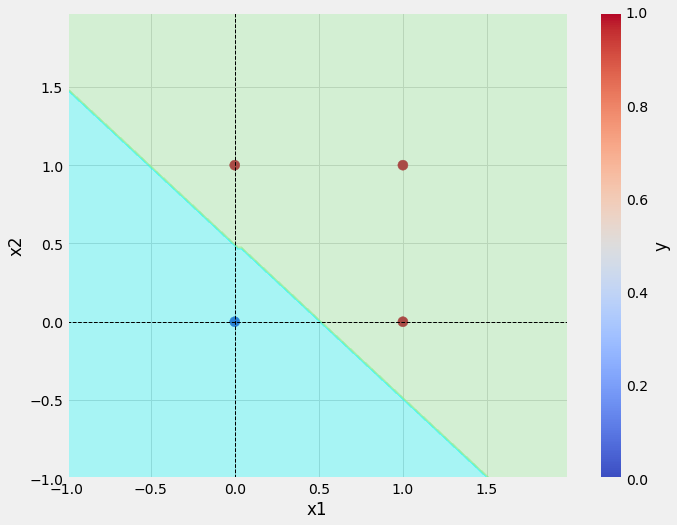

In [14]:

save_plot(df_OR, model_or, filename="or.png")

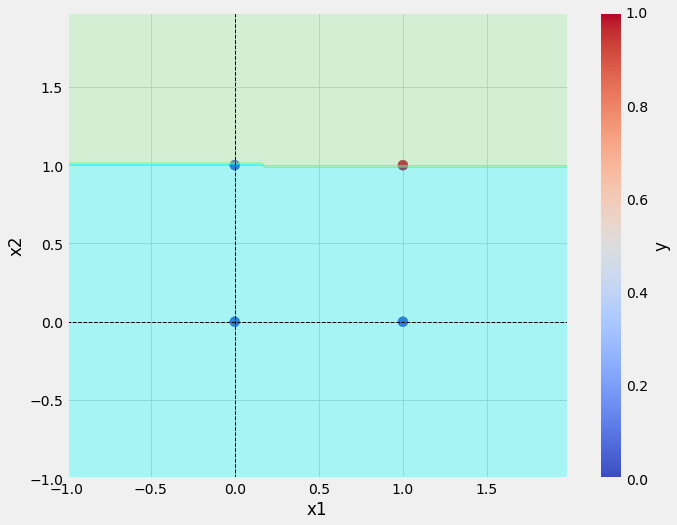

In [15]:
save_plot(df_AND, model_and, filename="and.png")

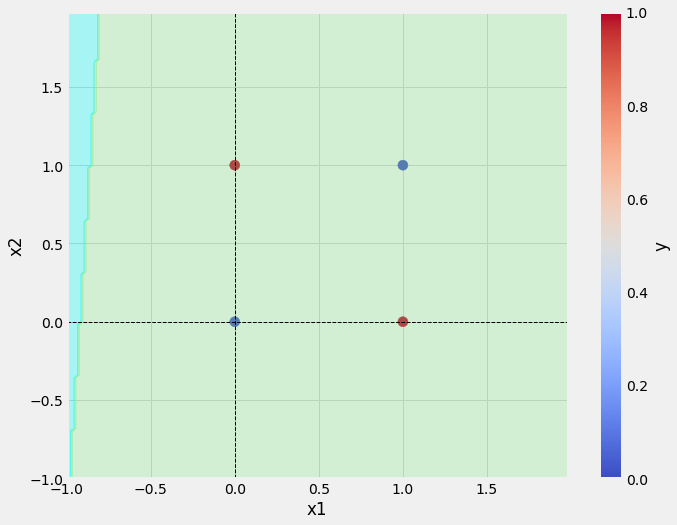

In [16]:
save_plot(df_XOR, model_xor, filename="xor.png")